In [273]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, chi2
from scipy.stats import pointbiserialr, chi2_contingency

# Dataset Description
### here is the dataset description , where it states what features means what

Feature
Full Form / Description


**Gender** -
Biological sex of the individual (Male/Female)


**Age** -
Age of the person in years


**Height** -
Height of the person in meters


**Weight** -
Weight of the person in kilograms


**family_history_with_overweight** -
Whether the person has a family history of overweight (Yes/No)


**FAVC** -
Frequent consumption of high-calorie food (Yes/No)


**FCVC** -
Frequency of consumption of vegetables (1-3, where 1 is low and 3 is high)


**NCP** -
Number of main meals consumed per day (1-4)


**CAEC** -
Consumption of food between meals (Never, Sometimes, Frequently, Always)


**SMOKE** -
Whether the person smokes (Yes/No)


**CH2O** -
Daily water consumption (in liters)


**SCC** -
Whether the person monitors calorie consumption (Yes/No)


**FAF** -
Physical activity frequency (0-3, where 0 is no activity and 3 is high)


**TUE** -
Time using technology devices (in hours)


**CALC** -
Frequency of alcohol consumption (Never, Sometimes, Frequently, Always)


**MTRANS** -
Mode of transportation used (Automobile, Bike, Motorbike, Public Transportation, Walking)

**NObeyesdad** -
Obesity level classification (Target variable)




In [274]:
#loading the dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [275]:
df = data.copy()
df1 = data.copy()

In [276]:
#seeing the dimension of the data
df.shape

(2111, 17)

In [277]:
#seeing the 1st 10 data
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [278]:
# seeing the last 10 data
df.tail(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,Female,25.722004,1.628470,107.218949,yes,yes,3.0,3.0,Sometimes,no,2.487070,no,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,yes,yes,3.0,3.0,Sometimes,no,1.650612,no,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,yes,yes,3.0,3.0,Sometimes,no,1.610768,no,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [279]:
#description of the database
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [280]:
#column name
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [281]:
#changing the column name
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

In [282]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [283]:
#information about the dataset (what are the feature types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [284]:
#checking for any null values in the features
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Family History with Overweight,0
Frequent consumption of high caloric food,0
Frequency of consumption of vegetables,0
Number of main meals,0
Consumption of food between meals,0
Smoke,0


The count plots for the categorical columns:


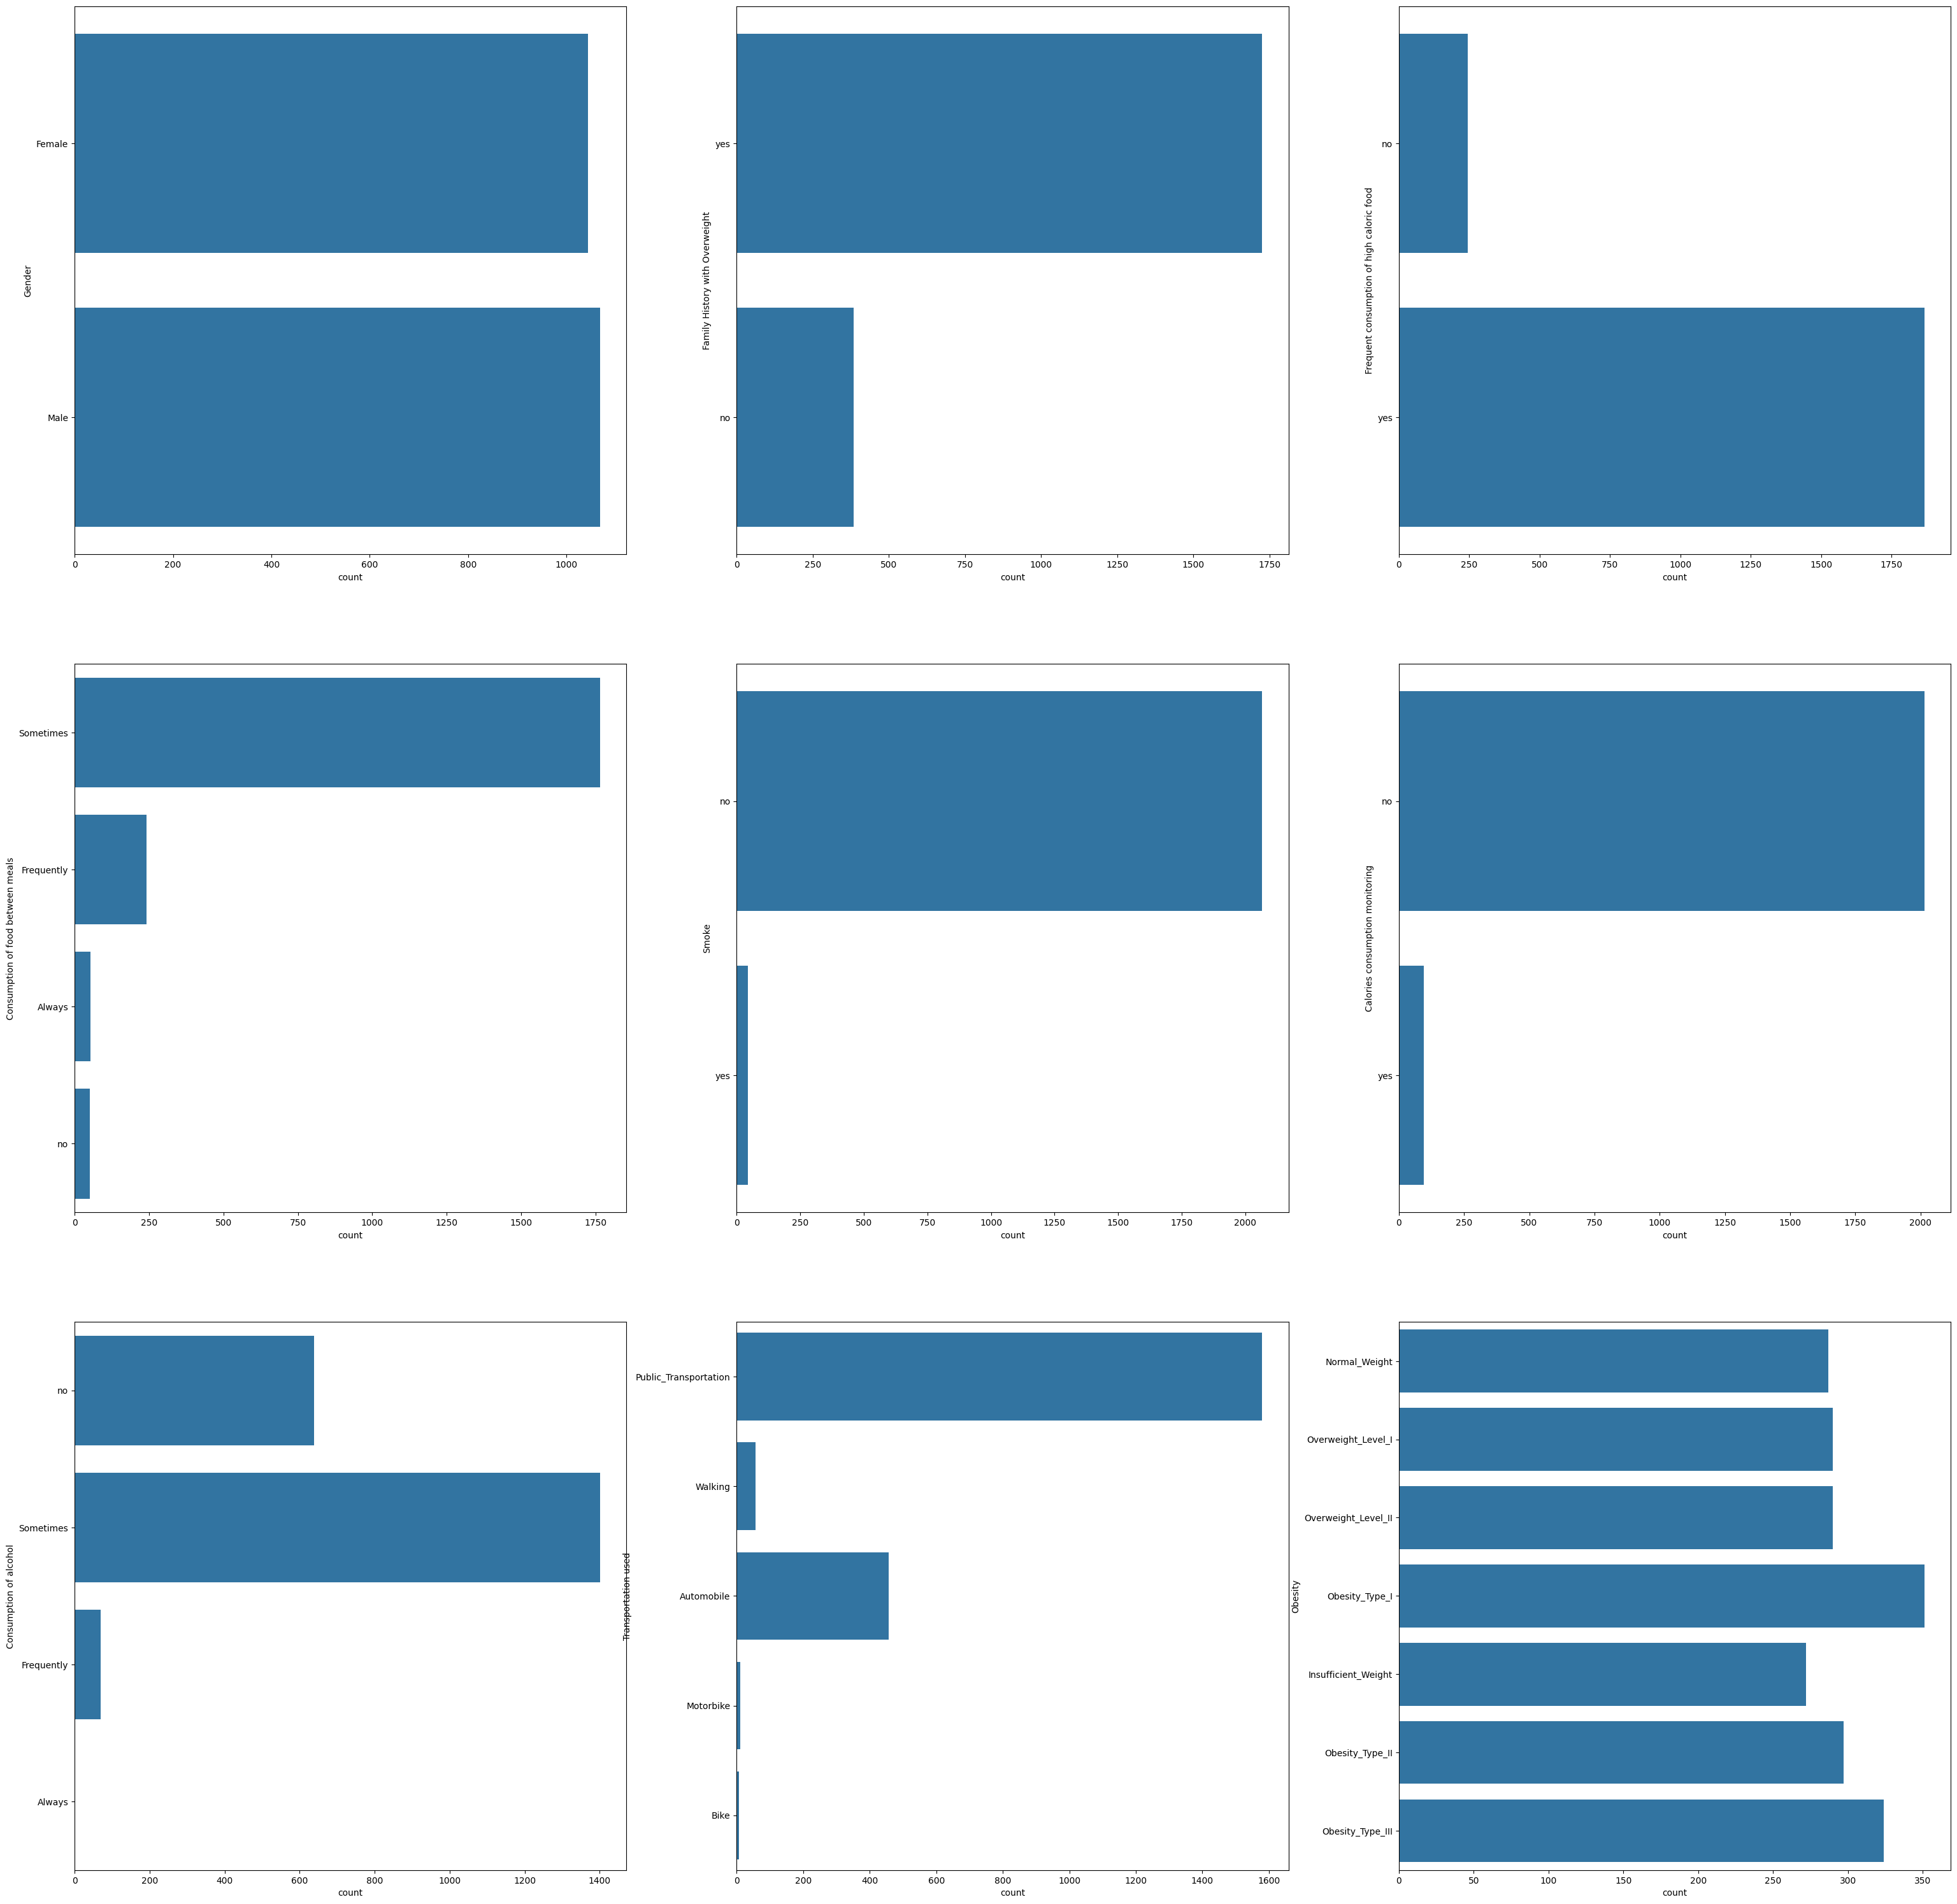

In [285]:
# Distrubution for categorical data :
cat_columns= df.select_dtypes(include='object').columns

print('The count plots for the categorical columns:')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

nCols=3   # The number of columns
nRows=3   # The number of corresponding rows

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(38,38))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


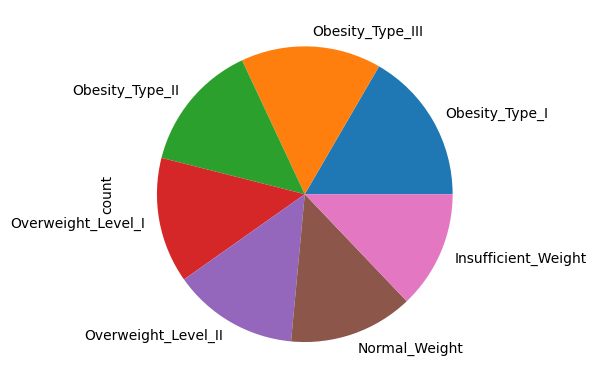

In [286]:
#distribution of the target value
# Databalancing may required for better performance Since Obesity Type 3 has significantly larger portion rather than other types
df['Obesity'].value_counts().plot(kind='pie')
df['Obesity'].value_counts()

,count
Gender,
Male,1068
Female,1043


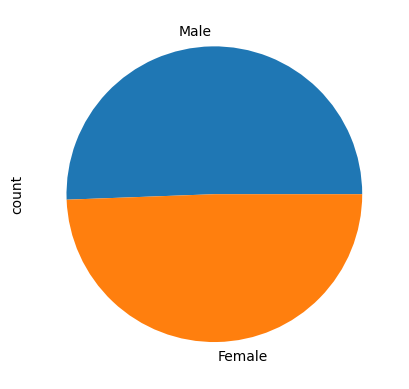

In [287]:
#distribution by gender (male and female) using pie graph
df['Gender'].value_counts().plot(kind='pie')
df['Gender'].value_counts()

,count
Consumption of alcohol,
Sometimes,1401
no,639
Frequently,70
Always,1


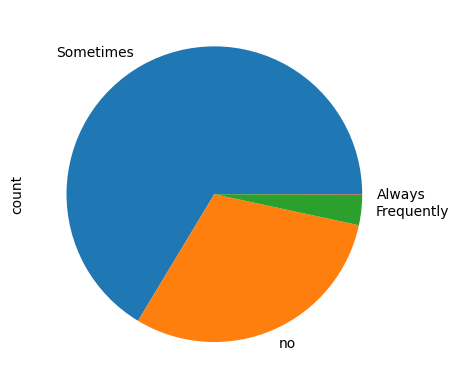

In [288]:
#distribution of alcohol consumption
df['Consumption of alcohol'].value_counts().plot(kind ='pie')
df['Consumption of alcohol'].value_counts()

<Axes: xlabel='Obesity'>

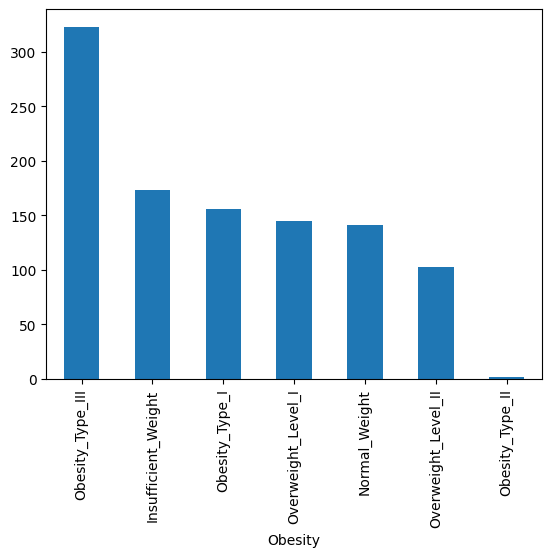

In [289]:
# obesity type in females
df[df['Gender'] == 'Female']['Obesity'].value_counts().plot(kind = 'bar')

# we can see obesity type 3 is more in females

<Axes: xlabel='Obesity'>

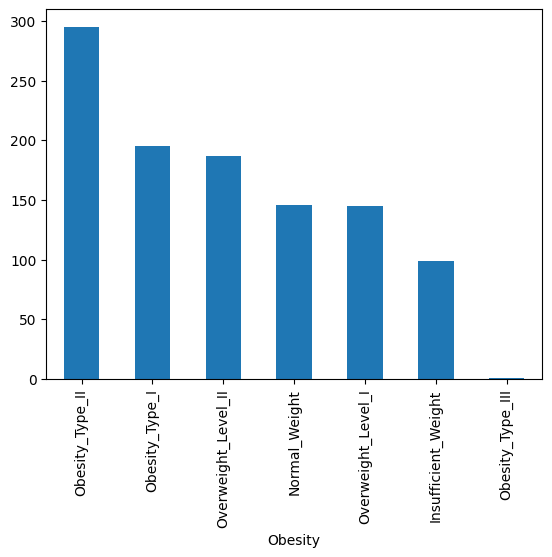

In [290]:
# obesity type in males
df[df['Gender'] == 'Male']['Obesity'].value_counts().plot(kind = 'bar')

## we can see obesity type 2 is more in males

The histogram plots for the numerical columns:


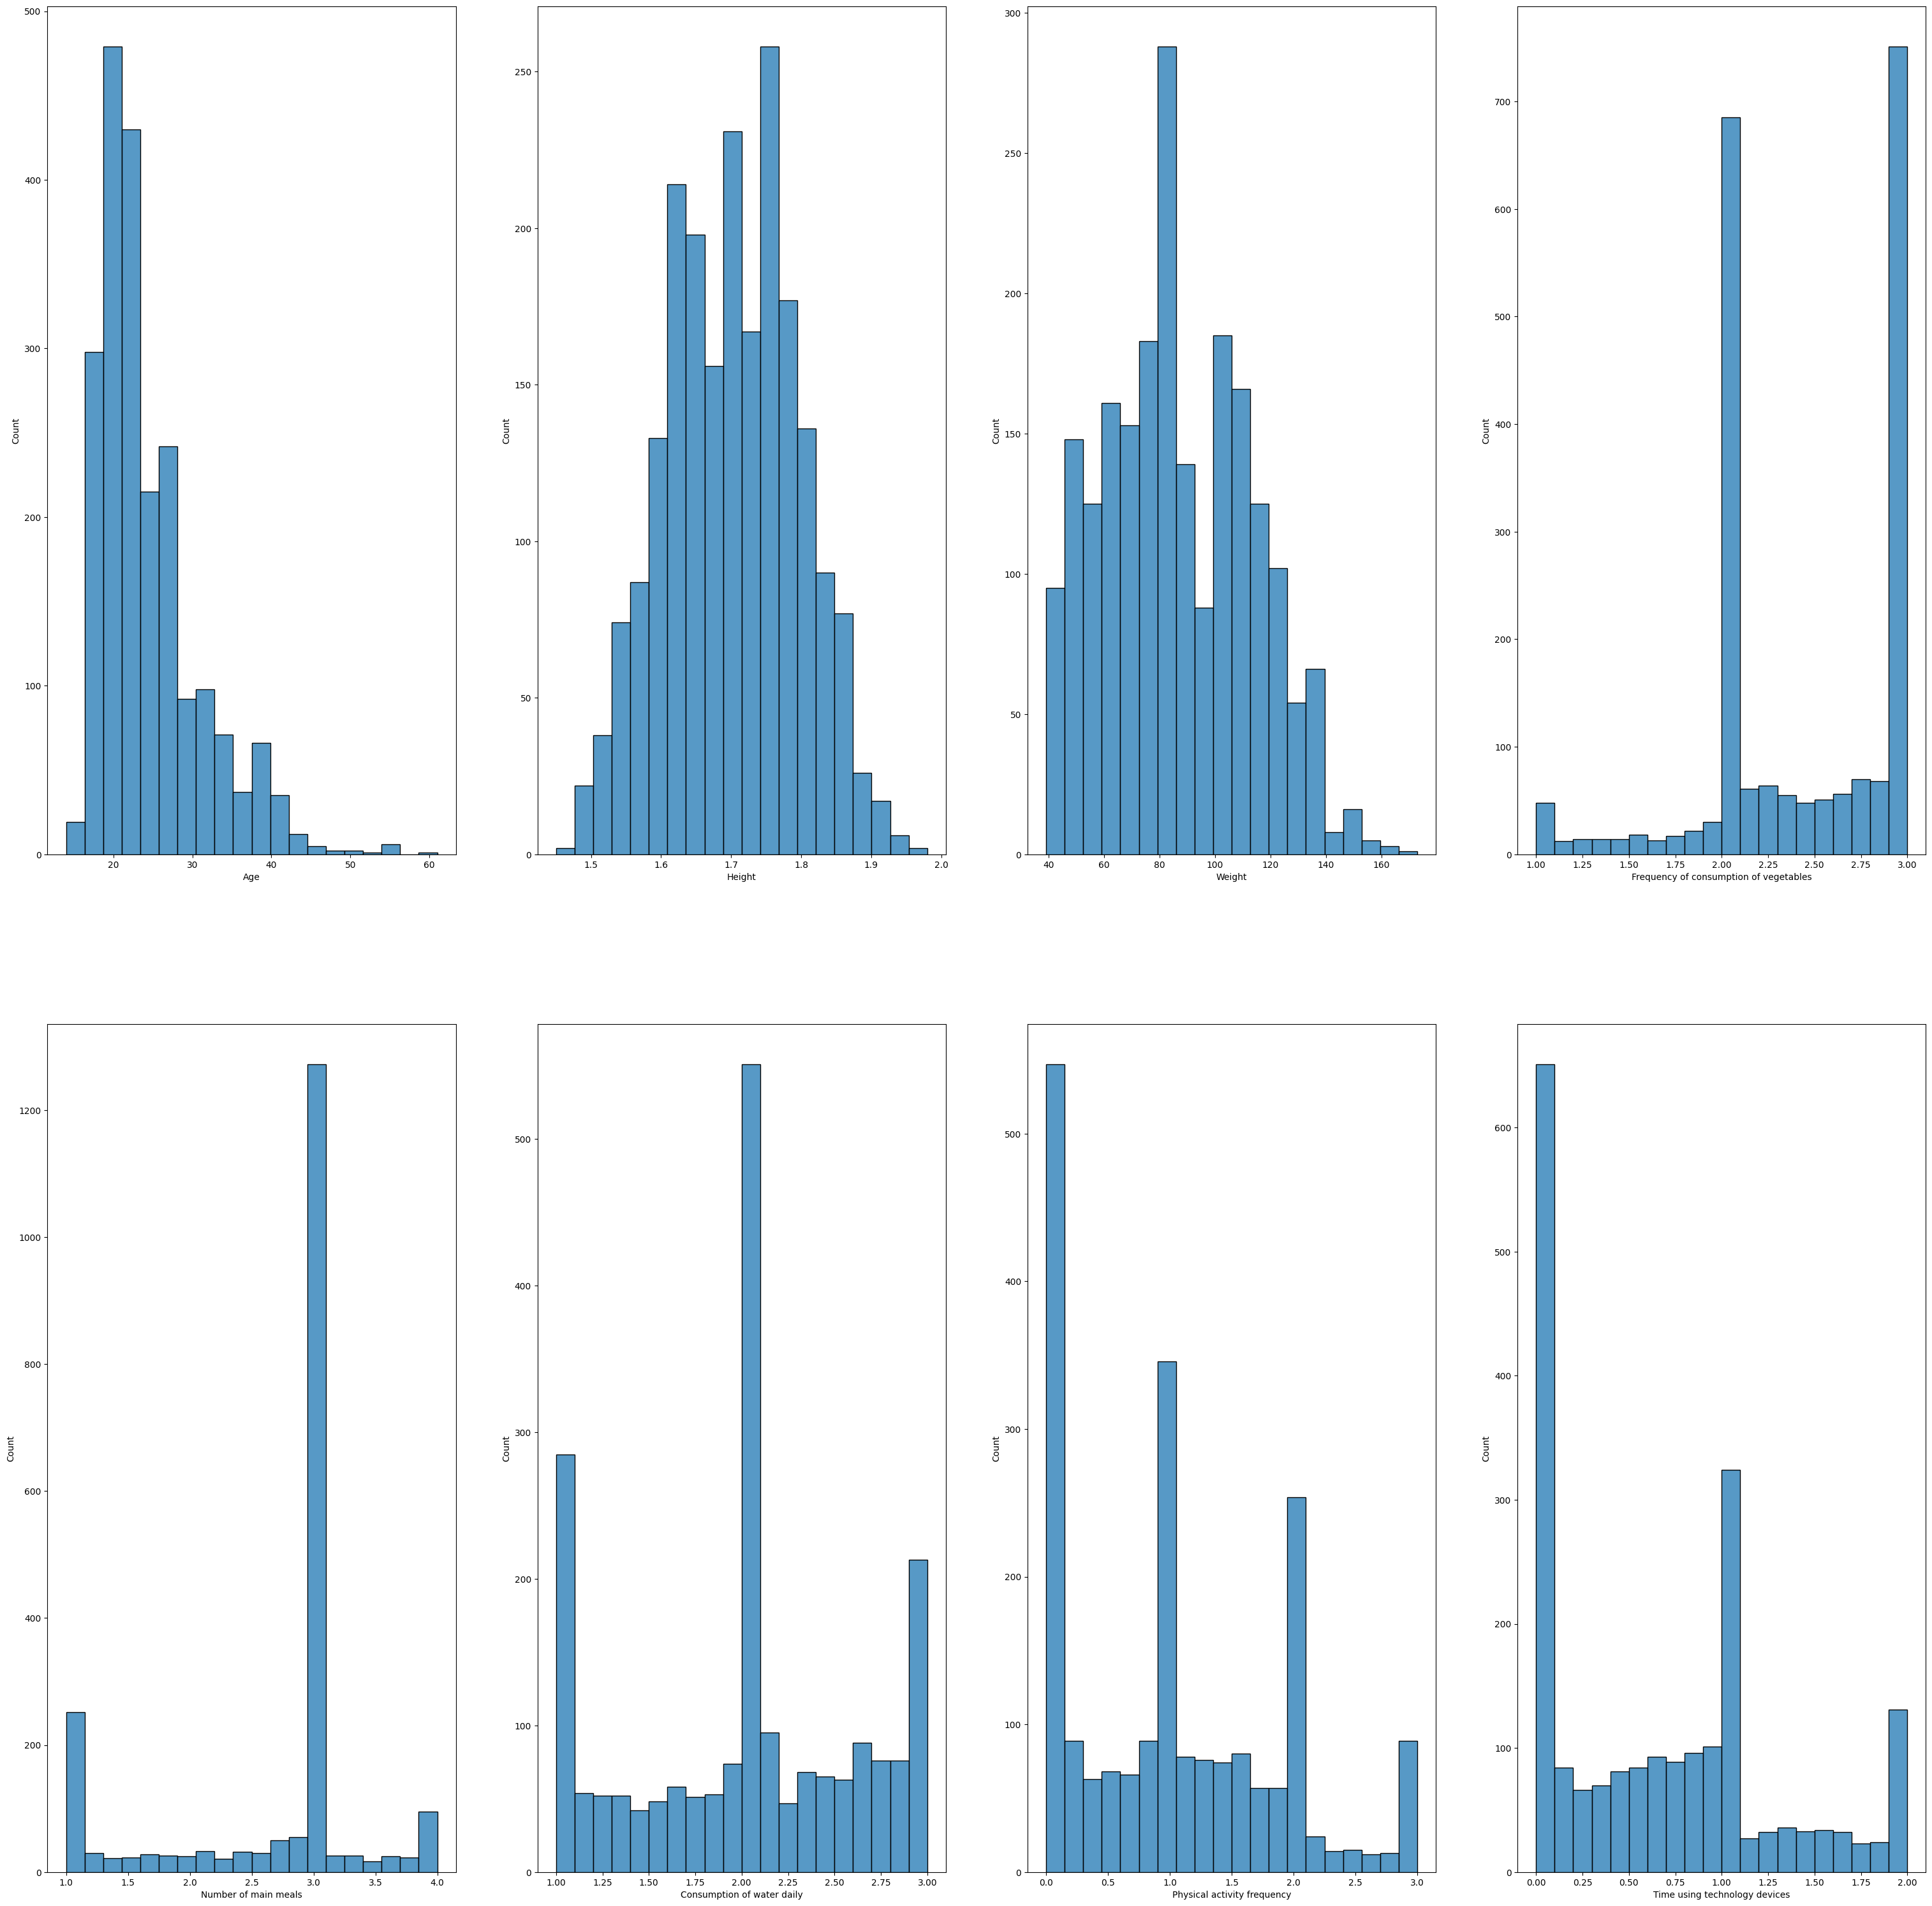

In [291]:
# For numerical data :
num_columns= df.select_dtypes(exclude='object').columns

nRows=2 # number of rows in the grid
nCols=4 # number of columns in the grid

print('The histogram plots for the numerical columns:')

fig,axes = plt.subplots(nRows, nCols, figsize=(38,38))
for ind,col in enumerate(num_columns):
    sns.histplot(x=col,bins=20,data=df,ax=axes.flatten()[ind]) # Used 20 bins for more accuracy.
plt.show()

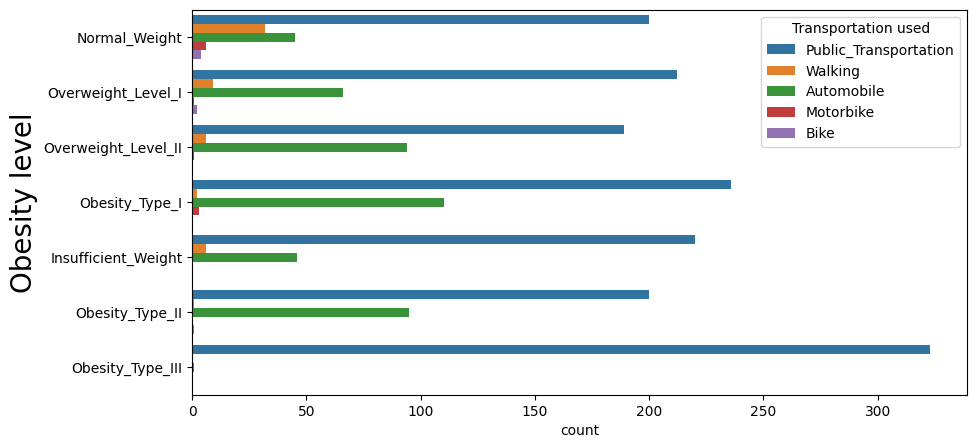

In [292]:
# Plotting Modes of Transportation against Obesity levels :

plt.figure(figsize=(10,5))
sns.countplot(y='Obesity',hue='Transportation used',data=df)
plt.ylabel('Obesity level', fontsize = 20)
plt.show()

# Feature Engineering
Adding Features to the dataset for better and higher performance and show how those factors can be related to the obesity level prediction which will be much more accurate than other factors.

## Nutritional Score
A nutritional score can be calculated based on factors like meal frequency, alcohol consumption, fast food consumption, and water intake

**Studies like "The Impact of Diet on Obesity and Metabolic Disease" (Kopp, 2019) highlight how diet quality directly influences obesity risk**.

Nutritional Score=FCVC+CH2O−(FAVC×2)

## Activity Score
Physical activity is one of the most critical factors in energy balance and weight regulation.
A combined activity score using features like exercise frequency (FAF), transportation mode, and sedentary time improves prediction accuracy.

"Physical Activity and Obesity: Epidemiologic Evidence and Mechanisms" (Jakicic & Davis, 2011)
This paper discusses how regular activity reduces obesity risk.


Activity Score=FAF+(MTRANS=Walking)

## Sedetary Score
Prolonged sitting and screen time are independent risk factors for obesity, even among people who exercise.
A sedentary score helps capture lifestyle risk beyond just exercise.

Sedentary Behavior and Obesity" (Thorp et al., 2011)
Highlights that even if someone exercises, excessive sitting increases obesity risk.

Sedentary Index=TUE/FAF+1




In [293]:
df


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [294]:
# Encode Gender for BMR calculation
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [295]:
# Calculate BMR based on Gender
df["BMR"] = df.apply(lambda row:
    (88.36 + (13.4 * row["Weight"]) + (4.8 * row["Height"]) - (5.7 * row["Age"])) if row["Gender"] == 1 else
    (447.6 + (9.2 * row["Weight"]) + (3.1 * row["Height"]) - (4.3 * row["Age"])), axis=1)

In [296]:
# Convert "Transportation used" to binary (1 if Walking, else 0) [Label encoding]
df["Walking"] = df["Transportation used"].apply(lambda x: 1 if x == "Walking" else 0)

In [297]:

# Calculate Activity Score
df["Activity_Score"] = df["Physical activity frequency"] + df["Walking"]

In [298]:
# Calculate Sedentary Index
df["Sedentary_Index"] = df["Time using technology devices"] / (df["Physical activity frequency"] + 1)


In [299]:
# Drop the intermediate categorical column of walking since its no longer needed
df = df.drop(columns=["Walking"])

In [300]:
# Convert categorical "Yes/No" to numeric (1 for "Yes", 0 for "No") [label encoding the categorical features]
df["Frequent consumption of high caloric food"] = df["Frequent consumption of high caloric food"].map({"yes": 1, "no": 0})

In [301]:
# Calculate Nutritional Score
df["Nutritional_Score"] = (
    df["Frequency of consumption of vegetables"] +
    df["Consumption of water daily"] -
    (df["Frequent consumption of high caloric food"] * 2)  # Now it's numerical (1 or 0)
)


In [302]:
#Final Looks of the dataset
df.head(10)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,BMR,Activity_Score,Sedentary_Index,Nutritional_Score
0,0,21.0,1.62,64.0,yes,0,2.0,3.0,Sometimes,no,...,no,0.0,1.0,no,Public_Transportation,Normal_Weight,951.122,0.0,1.000000,4.0
1,0,21.0,1.52,56.0,yes,0,3.0,3.0,Sometimes,yes,...,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,877.212,3.0,0.000000,6.0
2,1,23.0,1.80,77.0,yes,0,2.0,3.0,Sometimes,no,...,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,997.700,2.0,0.333333,4.0
3,1,27.0,1.80,87.0,no,0,3.0,3.0,Sometimes,no,...,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1108.900,3.0,0.000000,5.0
4,1,22.0,1.78,89.8,no,0,2.0,1.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1174.824,0.0,0.000000,4.0
5,1,29.0,1.62,53.0,no,1,2.0,3.0,Sometimes,no,...,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,641.036,0.0,0.000000,2.0
6,0,23.0,1.50,55.0,yes,1,3.0,3.0,Sometimes,no,...,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,859.350,1.0,0.000000,3.0
7,1,22.0,1.64,53.0,no,0,2.0,3.0,Sometimes,no,...,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,681.032,3.0,0.000000,4.0
8,1,24.0,1.78,64.0,yes,1,3.0,3.0,Sometimes,no,...,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,817.704,1.0,0.500000,3.0
9,1,22.0,1.72,68.0,yes,1,2.0,3.0,Sometimes,no,...,no,1.0,1.0,no,Public_Transportation,Normal_Weight,882.416,1.0,0.500000,2.0


In [303]:
# identify categorical variables (data type would be 'object')
cat = df.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                       False
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food    False
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
BMR                                          False
Activity_Score                               False
Sedentary_Index                

Age: 168 outliers detected
Height: 1 outliers detected
Weight: 1 outliers detected
Frequency of consumption of vegetables: 0 outliers detected
Number of main meals: 579 outliers detected
Consumption of water daily: 0 outliers detected
Physical activity frequency: 0 outliers detected
Time using technology devices: 0 outliers detected
BMR: 1 outliers detected
Activity_Score: 0 outliers detected
Sedentary_Index: 98 outliers detected
Nutritional_Score: 31 outliers detected


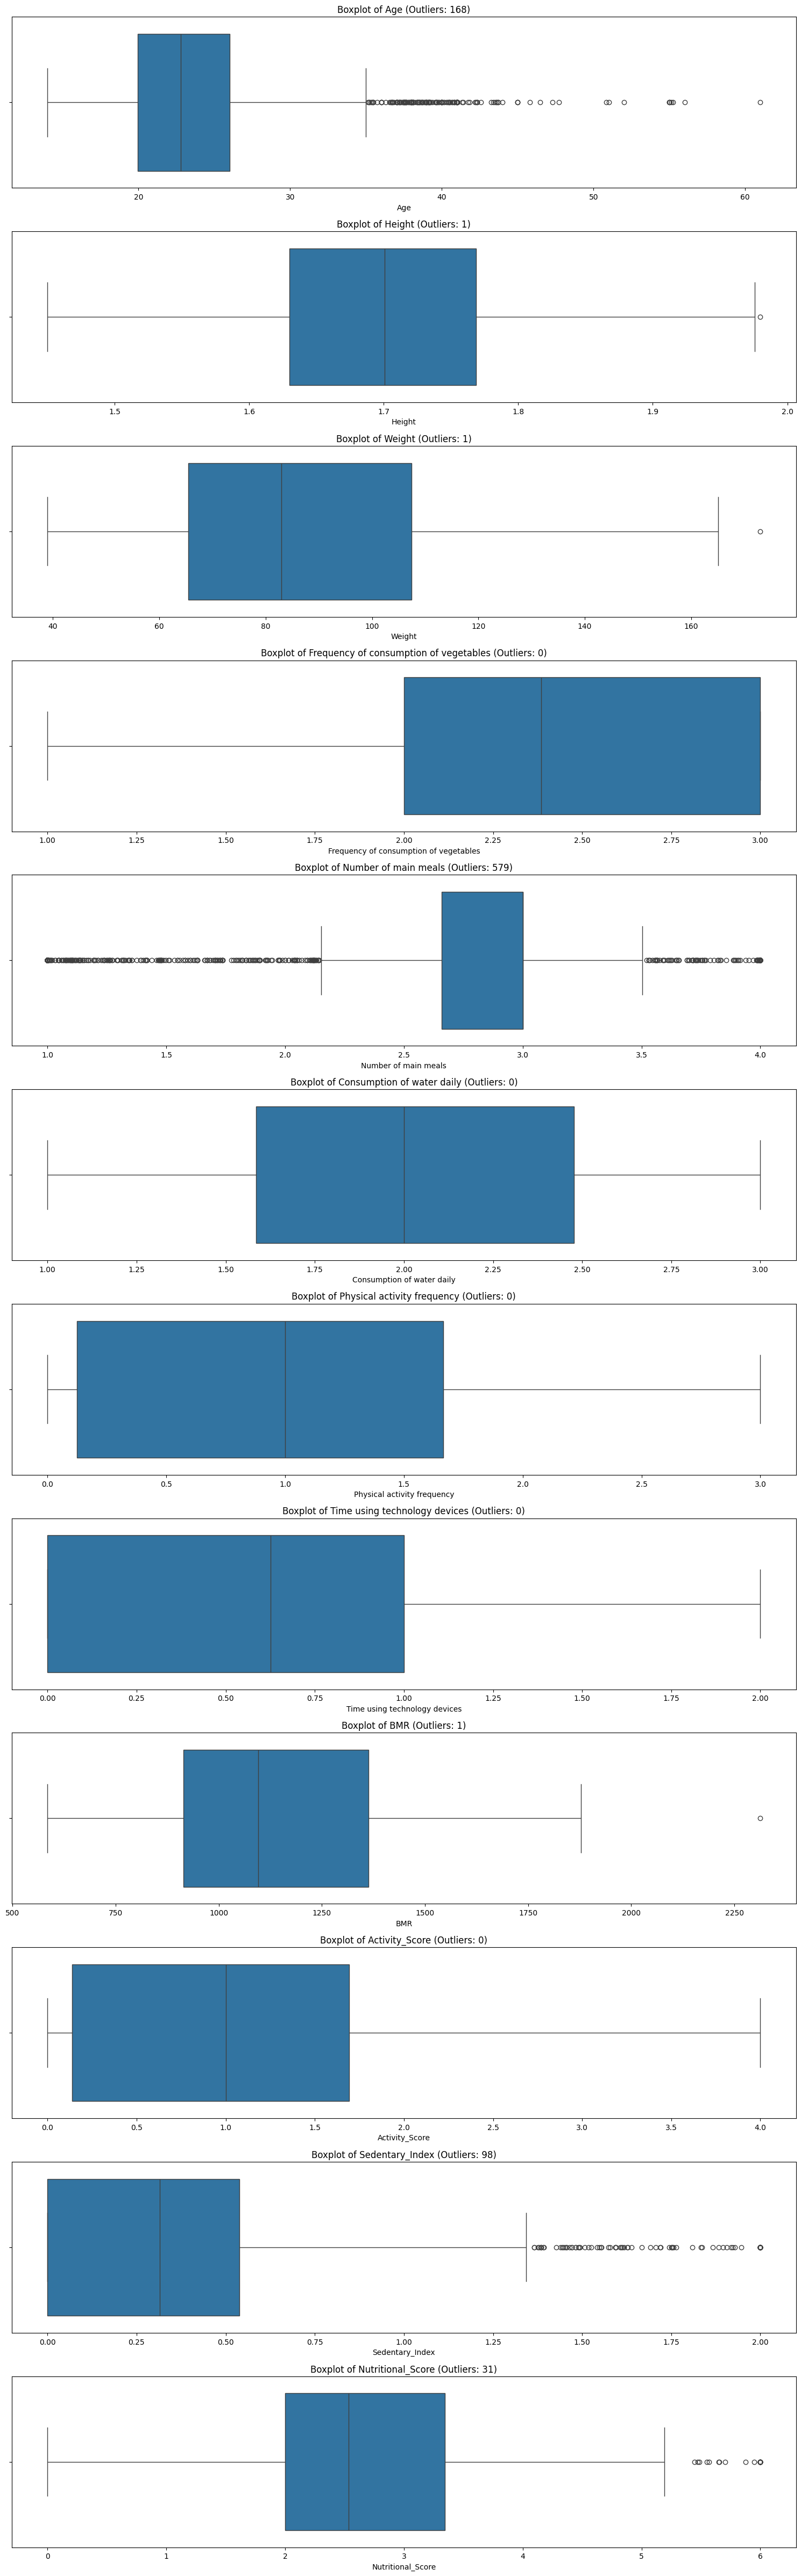

In [304]:

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}

    for col in columns:
        # Skip binary categorical variables (only 0 and 1)
        if df[col].nunique() <= 2:
            continue  #skip

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers using the inter quartile method
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            "num_outliers": len(outliers),
            "outlier_indices": outliers.index.tolist(),
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return outlier_info

# Select only continuous numerical columns
numerical_columns = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if df[col].nunique() > 2  # Exclude binary categorical variables
]

# Detect outliers
outlier_results = detect_outliers_iqr(df, numerical_columns)

# Print results
for col, info in outlier_results.items():
    print(f"{col}: {info['num_outliers']} outliers detected")

# Features with detected outliers
outlier_columns = list(outlier_results.keys())

# Set up multiple subplots
plt.figure(figsize=(15, len(outlier_columns) * 4))

# Loop through each feature and create a boxplot
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outliers: {outlier_results[col]['num_outliers']})")

plt.tight_layout()
plt.show()

### Removing outliers that is not necessary because those value does't alling with all other values in the dataset

In [305]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()  # Create a copy to avoid modifying original data

    for col in columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Remove outliers from numerical columns
df_cleaned = remove_outliers_iqr(df, numerical_columns)
df = df_cleaned.copy()

# Print shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (1338, 21)
Cleaned dataset shape: (1338, 21)


In [306]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1338.0,0.517190,0.499891,0.000000,0.000000,1.000000,1.000000,1.000000
Age,1338.0,23.201224,4.179430,14.000000,19.973698,22.821925,25.990880,35.000000
Height,1338.0,1.715852,0.087735,1.450000,1.650000,1.716509,1.777801,1.975663
Weight,1338.0,92.708268,27.308312,39.000000,70.110694,93.155142,113.086584,165.057269
Frequent consumption of high caloric food,1338.0,0.896861,0.304254,0.000000,1.000000,1.000000,1.000000,1.000000
Frequency of consumption of vegetables,1338.0,2.461480,0.544388,1.000000,2.000000,2.576700,3.000000,3.000000
Number of main meals,1338.0,2.965693,0.166872,2.152733,3.000000,3.000000,3.000000,3.502604
Consumption of water daily,1338.0,2.039304,0.605333,1.000000,1.648956,2.000000,2.530396,3.000000
Physical activity frequency,1338.0,1.057630,0.835289,0.000000,0.245325,1.000000,1.645623,3.000000
Time using technology devices,1338.0,0.662568,0.548848,0.000000,0.122064,0.675817,1.000000,2.000000


## Feature Encoding and Scalling

In [307]:
#seeing the type of data that are available in the dataset to encode
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     1338 non-null   int64  
 1   Age                                        1338 non-null   float64
 2   Height                                     1338 non-null   float64
 3   Weight                                     1338 non-null   float64
 4   Family History with Overweight             1338 non-null   object 
 5   Frequent consumption of high caloric food  1338 non-null   int64  
 6   Frequency of consumption of vegetables     1338 non-null   float64
 7   Number of main meals                       1338 non-null   float64
 8   Consumption of food between meals          1338 non-null   object 
 9   Smoke                                      1338 non-null   object 
 10  Consumption of water daily   

In [308]:
# identify categorical variables (data type would be 'object')
cat = df.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                       False
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food    False
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
BMR                                          False
Activity_Score                               False
Sedentary_Index                

 Categorical variables: Index(['Family History with Overweight', 'Consumption of food between meals',
       'Smoke', 'Calories consumption monitoring', 'Consumption of alcohol',
       'Transportation used', 'Obesity'],

In [309]:
#Encoding categorical variable into numerical value using label encoding
le = LabelEncoder()
for col in cat_labels:
    df[col] = le.fit_transform(df[col])


In [310]:
df.head(10)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,BMR,Activity_Score,Sedentary_Index,Nutritional_Score
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,0,0.0,1.0,2,3,1,951.122,0.0,1.000000,4.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,0,2.0,1.0,0,3,1,997.700,2.0,0.333333,4.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2.0,0.0,0,4,5,1108.900,3.0,0.000000,5.0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,...,0,0.0,0.0,1,0,1,641.036,0.0,0.000000,2.0
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,...,0,1.0,0.0,1,2,1,859.350,1.0,0.000000,3.0
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,...,0,3.0,0.0,1,3,1,681.032,3.0,0.000000,4.0
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,...,0,1.0,1.0,0,3,1,817.704,1.0,0.500000,3.0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,...,0,1.0,1.0,2,3,1,882.416,1.0,0.500000,2.0
10,1,26.0,1.85,105.0,1,1,3.0,3.0,1,0,...,0,2.0,2.0,1,3,2,1356.040,2.0,0.666667,4.0
11,0,21.0,1.72,80.0,1,1,2.0,3.0,1,0,...,1,2.0,1.0,1,3,6,1098.632,2.0,0.333333,2.0


In [311]:
#seperate feature x and Target y
x = df.drop('Obesity', axis=1)
y = df['Obesity']


In [312]:
x.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,BMR,Activity_Score,Sedentary_Index,Nutritional_Score
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,2,3,951.122,0.0,1.000000,4.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,0,3,997.700,2.0,0.333333,4.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,0,4,1108.900,3.0,0.000000,5.0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,1,0,641.036,0.0,0.000000,2.0
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,1,2,859.350,1.0,0.000000,3.0


In [313]:
y.head()

,Obesity
0,1
2,1
3,5
5,1
6,1


In [314]:
#now scale the numerical features so that everything is in the range of 0 to 1
#so that the model will not be biased towards one features
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [315]:
#After scaling the numerical Variable
x.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,BMR,Activity_Score,Sedentary_Index,Nutritional_Score
0,0.0,0.333333,0.323401,0.198323,1.0,0.0,0.5,0.627665,0.666667,0.0,0.5,0.0,0.000000,0.5,1.0,0.75,0.283313,0.00,0.744867,0.770271
1,1.0,0.428571,0.665826,0.301450,1.0,0.0,0.5,0.627665,0.666667,0.0,0.5,0.0,0.666667,0.5,0.0,0.75,0.319341,0.50,0.248289,0.770271
2,1.0,0.619048,0.665826,0.380779,0.0,0.0,1.0,0.627665,0.666667,0.0,0.5,0.0,0.666667,0.0,0.0,1.00,0.405355,0.75,0.000000,0.962839
3,1.0,0.714286,0.323401,0.111061,0.0,1.0,0.5,0.627665,0.666667,0.0,0.5,0.0,0.000000,0.0,0.5,0.00,0.043461,0.00,0.000000,0.385135
4,0.0,0.428571,0.095118,0.126926,1.0,1.0,1.0,0.627665,0.666667,0.0,0.5,0.0,0.333333,0.0,0.5,0.50,0.212328,0.25,0.000000,0.577703


In [316]:
# Step 5: Compute Correlation Matrix for Features (X)
feature_correlation_matrix = x.corr()

# Step 6: Compute Correlation Between `X` and `y`
correlation_with_y = {}

# (A) For numerical features, use Point Biserial Correlation
for col in x.columns:
    correlation_with_y[col], _ = pointbiserialr(x[col], y)

# (B) For categorical features, use Cramér's V
def cramers_v(x, y):
    """Calculate Cramér's V for categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

for col in x.select_dtypes(include=['int64', 'object']).columns:  # Use original X (before scaling)
    correlation_with_y[col] = cramers_v(x[col], y)

# Convert correlation results to DataFrame
correlation_with_y_df = pd.DataFrame(correlation_with_y.items(), columns=["Feature", "Correlation with Target"])
correlation_with_y_df = correlation_with_y_df.sort_values(by="Correlation with Target", ascending=False)

# Step 7: Print Results
print("\nFeature Correlation Matrix (X Only):\n", feature_correlation_matrix)
print("\nCorrelation Between Features and Target:\n", correlation_with_y_df)


Feature Correlation Matrix (X Only):
                                              Gender       Age    Height  \
Gender                                     1.000000  0.164519  0.608884   
Age                                        0.164519  1.000000  0.117374   
Height                                     0.608884  0.117374  1.000000   
Weight                                     0.026920  0.293005  0.431715   
Family History with Overweight             0.069094  0.237623  0.220260   
Frequent consumption of high caloric food  0.016583  0.129968  0.184339   
Frequency of consumption of vegetables    -0.399327  0.059629 -0.091890   
Number of main meals                      -0.154932 -0.100547 -0.048054   
Consumption of food between meals          0.043478  0.142810  0.064268   
Smoke                                      0.092673  0.145829  0.123654   
Consumption of water daily                 0.079599  0.028833  0.203123   
Calories consumption monitoring           -0.107235 -0.119756

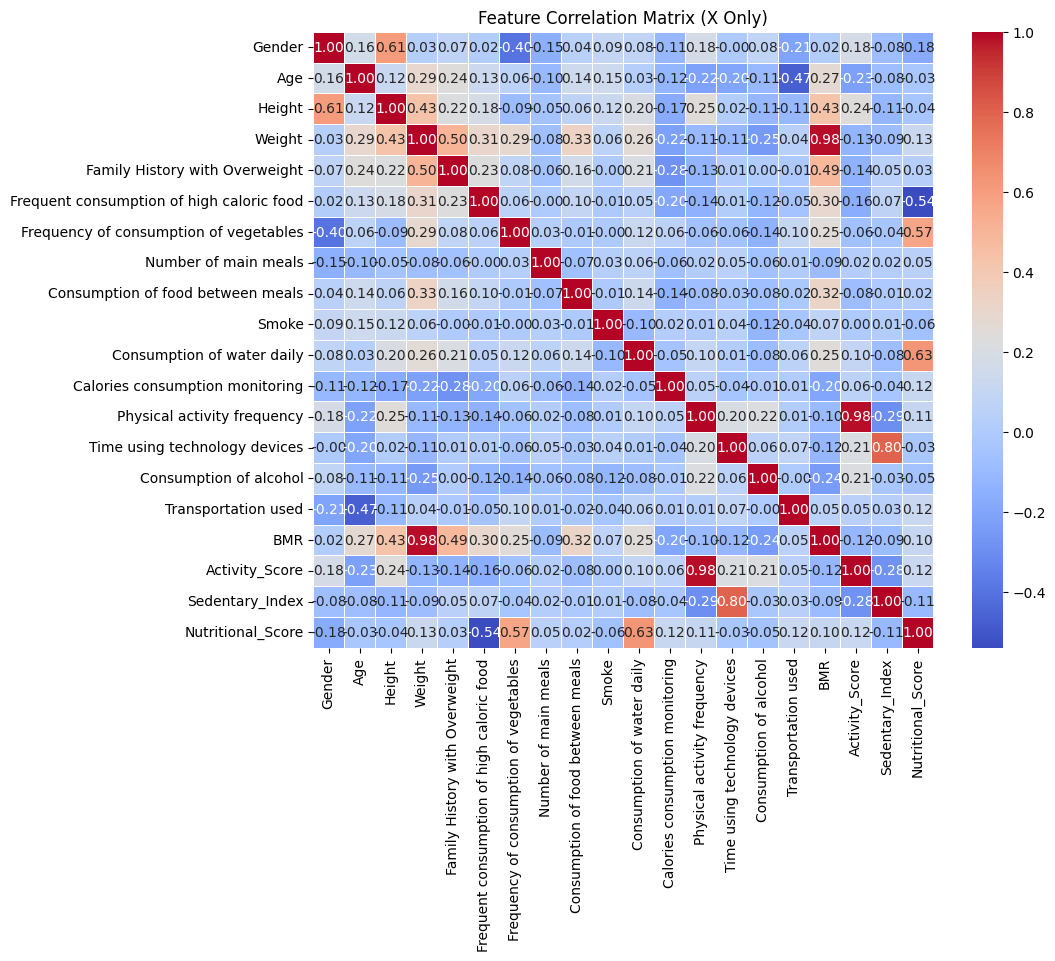

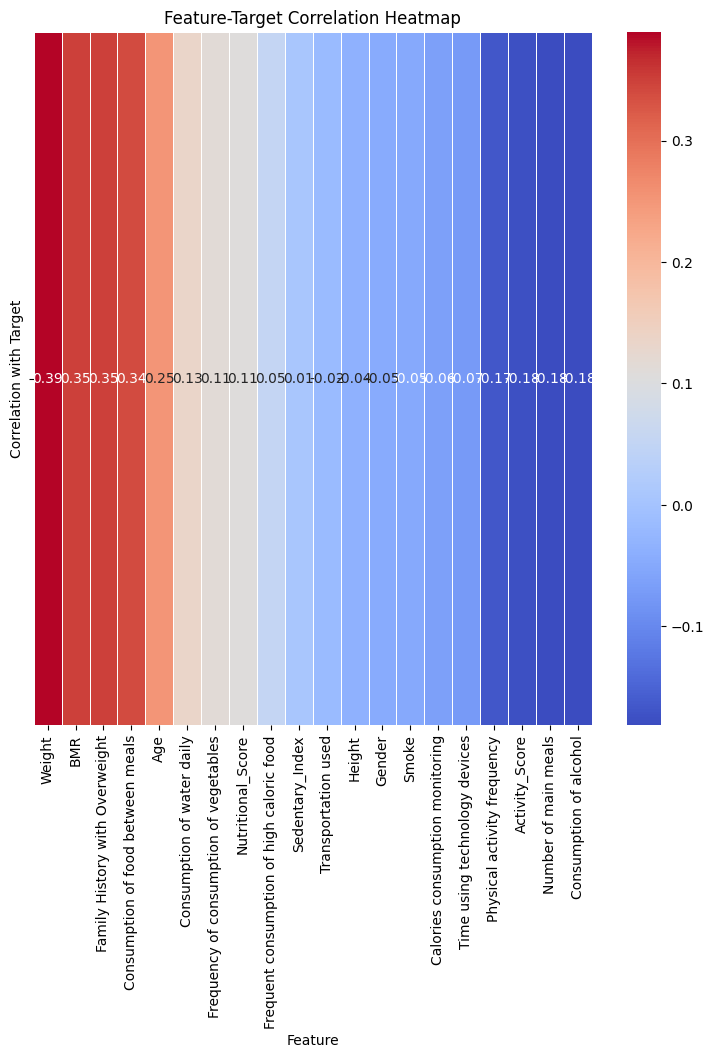

In [317]:

#Feature Correlation Matrix Heatmap (X only)
plt.figure(figsize=(10, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix (X Only)")
plt.show()

#Correlation Between Features and Target (y)
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_with_y_df.set_index("Feature").T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature-Target Correlation Heatmap")
plt.show()

In [318]:
"""corr_matrix_updated = df_encoded.corr()
# Plot heatmap again after adding new features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_updated, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Updated Feature Correlation Matrix")
plt.show()

"""

'corr_matrix_updated = df_encoded.corr()\n# Plot heatmap again after adding new features\nplt.figure(figsize=(12, 8))\nsns.heatmap(corr_matrix_updated, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)\nplt.title("Updated Feature Correlation Matrix")\nplt.show()\n\n'

In [319]:
#correlation of all features
corr_matrix = df.corr()
corr_matrix



,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,BMR,Activity_Score,Sedentary_Index,Nutritional_Score
Gender,1.000000,0.164519,0.608884,0.026920,0.069094,0.016583,-0.399327,-0.154932,0.043478,0.092673,...,-0.107235,0.180883,-0.004932,0.075024,-0.207463,-0.046322,0.018596,0.180097,-0.079068,-0.175450
Age,0.164519,1.000000,0.117374,0.293005,0.237623,0.129968,0.059629,-0.100547,0.142810,0.145829,...,-0.119756,-0.218259,-0.199469,-0.106133,-0.472690,0.252596,0.273329,-0.225074,-0.076959,-0.028546
Height,0.608884,0.117374,1.000000,0.431715,0.220260,0.184339,-0.091890,-0.048054,0.064268,0.123654,...,-0.173041,0.247093,0.019446,-0.114392,-0.111079,-0.035074,0.433971,0.238313,-0.113558,-0.038397
Weight,0.026920,0.293005,0.431715,1.000000,0.502512,0.305256,0.287741,-0.075890,0.327897,0.057655,...,-0.224204,-0.105688,-0.113836,-0.250027,0.036462,0.389285,0.984291,-0.125075,-0.085072,0.126672
Family History with Overweight,0.069094,0.237623,0.220260,0.502512,1.000000,0.232382,0.076300,-0.062707,0.159904,-0.002325,...,-0.276866,-0.130614,0.005737,0.004408,-0.011473,0.350232,0.487096,-0.140955,0.048188,0.027908
Frequent consumption of high caloric food,0.016583,0.129968,0.184339,0.305256,0.232382,1.000000,0.055532,-0.000890,0.095750,-0.005668,...,-0.196159,-0.138318,0.014557,-0.121666,-0.051932,0.054442,0.296156,-0.163484,0.066431,-0.539021
Frequency of consumption of vegetables,-0.399327,0.059629,-0.091890,0.287741,0.076300,0.055532,1.000000,0.026829,-0.007553,-0.002541,...,0.055234,-0.061554,-0.058046,-0.142431,0.102442,0.113861,0.252830,-0.062061,-0.038104,0.572838
Number of main meals,-0.154932,-0.100547,-0.048054,-0.075890,-0.062707,-0.000890,0.026829,1.000000,-0.068817,0.028953,...,-0.064251,0.019925,0.045562,-0.063301,0.005110,-0.180340,-0.089267,0.024855,0.021861,0.048257
Consumption of food between meals,0.043478,0.142810,0.064268,0.327897,0.159904,0.095750,-0.007553,-0.068817,1.000000,-0.012490,...,-0.140203,-0.078065,-0.026037,-0.075587,-0.020885,0.338374,0.316873,-0.084184,-0.013295,0.021936
Smoke,0.092673,0.145829,0.123654,0.057655,-0.002325,-0.005668,-0.002541,0.028953,-0.012490,1.000000,...,0.023924,0.005390,0.039011,-0.118788,-0.035789,-0.049194,0.069330,0.001307,0.014582,-0.059367


In [320]:
#connection with the obesity of each features
corr_matrix['Obesity'].sort_values(ascending=False)

,Obesity
Obesity,1.000000
Weight,0.389285
BMR,0.350992
Family History with Overweight,0.350232
Consumption of food between meals,0.338374
Age,0.252596
Consumption of water daily,0.134805
Frequency of consumption of vegetables,0.113861
Nutritional_Score,0.108089
Frequent consumption of high caloric food,0.054442


## Since i got the features that are highly positievely or negatievely corelated with the target variable.

positive corelation means: if x increase then y also increase
negative corelation means: if x increase then y decrease

since we have many features that are both positievely or negatievely corelated with our target variable so we will be using **Recursive feature Eliniation technique**

LINK : https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html




In [321]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the features
selected_features = df.drop(columns=["Obesity"]).columns

# Define the model
model = RandomForestClassifier()

# Apply RFE to select the best features
rfe = RFE(model, n_features_to_select=7)  # Keep top How many features i want
X_selected = rfe.fit_transform(df[selected_features], df["Obesity"])

# Print selected features
selected_features_rfe = [feature for feature, selected in zip(selected_features, rfe.support_) if selected]
print("Selected Features:", selected_features_rfe)


Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'BMR', 'Nutritional_Score']


# Model Training

In [322]:
pip install xgboost catboost lightgbm

In [323]:
# Define X (features) and y (target)
# Define X (features) and y (target)
X_selected = x[selected_features_rfe]
y = df["Obesity"]



In [324]:
#seeing the target variable
y.head()

,Obesity
0,1
2,1
3,5
5,1
6,1


In [325]:
#seeing the selected features
X_selected.head()

,Gender,Age,Height,Weight,Frequency of consumption of vegetables,BMR,Nutritional_Score
0,0.0,0.333333,0.323401,0.198323,0.5,0.283313,0.770271
1,1.0,0.428571,0.665826,0.301450,0.5,0.319341,0.770271
2,1.0,0.619048,0.665826,0.380779,1.0,0.405355,0.962839
3,1.0,0.714286,0.323401,0.111061,0.5,0.043461,0.385135
4,0.0,0.428571,0.095118,0.126926,1.0,0.212328,0.577703


In [326]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Check the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 7)
X_test shape: (268, 7)
y_train shape: (1070,)
y_test shape: (268,)


In [327]:
# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [328]:
#initializing the models
log_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()
knn_model = KNeighborsClassifier()

gausian_model = GaussianNB()
decision_model = DecisionTreeClassifier()
gradient_model = GradientBoostingClassifier()
catboost_model = CatBoostClassifier()
lightgbm_model = LGBMClassifier()


In [329]:
#train the models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

gausian_model.fit(X_train, y_train)
decision_model.fit(X_train, y_train)
gradient_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)

Learning rate set to 0.0794
0:	learn: 1.7509672	total: 16.7ms	remaining: 16.7s
1:	learn: 1.5830068	total: 49.4ms	remaining: 24.7s
2:	learn: 1.4598584	total: 86.6ms	remaining: 28.8s
3:	learn: 1.3578720	total: 112ms	remaining: 27.9s
4:	learn: 1.2671041	total: 147ms	remaining: 29.3s
5:	learn: 1.1914730	total: 160ms	remaining: 26.5s
6:	learn: 1.1207479	total: 177ms	remaining: 25.1s
7:	learn: 1.0538480	total: 197ms	remaining: 24.4s
8:	learn: 0.9973932	total: 215ms	remaining: 23.6s
9:	learn: 0.9497442	total: 236ms	remaining: 23.4s
10:	learn: 0.9110662	total: 249ms	remaining: 22.4s
11:	learn: 0.8669093	total: 267ms	remaining: 22s
12:	learn: 0.8311245	total: 286ms	remaining: 21.7s
13:	learn: 0.7998446	total: 300ms	remaining: 21.1s
14:	learn: 0.7703550	total: 311ms	remaining: 20.4s
15:	learn: 0.7414391	total: 334ms	remaining: 20.5s
16:	learn: 0.7132904	total: 410ms	remaining: 23.7s
17:	learn: 0.6844558	total: 450ms	remaining: 24.5s
18:	learn: 0.6590627	total: 463ms	remaining: 23.9s
19:	learn: 0

LGBMClassifier()

In [330]:
#Make the predictions on the test set
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

gausian_pred = gausian_model.predict(X_test)
decision_pred = decision_model.predict(X_test)
gradient_pred = gradient_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)



In [331]:
#Evalutating the model performance
lr_acuracy = accuracy_score(y_test, log_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

lr_precision = precision_score(y_test, log_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
knn_precision = precision_score(y_test, knn_pred, average='weighted')

lr_recall = recall_score(y_test, log_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')

gausian_accuracy = accuracy_score(y_test, gausian_pred)
decision_accuracy = accuracy_score(y_test, decision_pred)
gradient_accuracy = accuracy_score(y_test, gradient_pred)
catboost_accuracy = accuracy_score(y_test, catboost_pred)

gausian_precision = precision_score(y_test, gausian_pred, average='weighted')
decision_precision = precision_score(y_test, decision_pred, average='weighted')
gradient_precision = precision_score(y_test, gradient_pred, average='weighted')
catboost_precision = precision_score(y_test, catboost_pred, average='weighted')

gausian_recall = recall_score(y_test, gausian_pred, average='weighted')
decision_recall = recall_score(y_test, decision_pred, average='weighted')
gradient_recall = recall_score(y_test, gradient_pred, average='weighted')
catboost_recall = recall_score(y_test, catboost_pred, average='weighted')



In [332]:
results_dict = {
    "Model": [
        "Logistic Regression", "Random Forest", "SVM", "XGBoost", "KNN",
        "Gaussian Naive Bayes", "Decision Tree", "Gradient Boosting", "CatBoost"
    ],
    "Accuracy": [lr_acuracy, rf_accuracy, svm_accuracy, xgb_accuracy, knn_accuracy,
                 gausian_accuracy, decision_accuracy, gradient_accuracy, catboost_accuracy],
    "Precision": [lr_precision, rf_precision, svm_precision, xgb_precision, knn_precision,
                  gausian_precision, decision_precision, gradient_precision, catboost_precision],
    "Recall": [lr_recall, rf_recall, svm_recall, xgb_recall, knn_recall,
               gausian_recall, decision_recall, gradient_recall, catboost_recall]
}

# Convert to DataFrame
scores_df = pd.DataFrame(results_dict)

# Display results in tabular format
print(scores_df)


                  Model  Accuracy  Precision    Recall
0   Logistic Regression  0.723881   0.680175  0.723881
1         Random Forest  0.958955   0.959683  0.958955
2                   SVM  0.888060   0.888739  0.888060
3               XGBoost  0.951493   0.952015  0.951493
4                   KNN  0.888060   0.889648  0.888060
5  Gaussian Naive Bayes  0.641791   0.612920  0.641791
6         Decision Tree  0.947761   0.948964  0.947761
7     Gradient Boosting  0.947761   0.949463  0.947761
8              CatBoost  0.962687   0.964225  0.962687


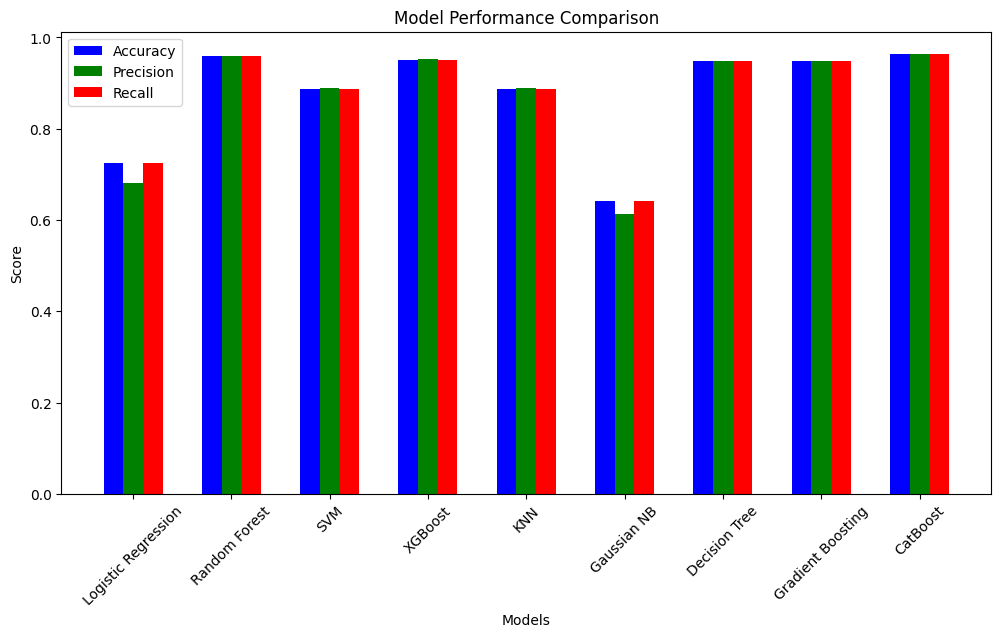

In [333]:

# Define models and scores
models = ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "KNN",
          "Gaussian NB", "Decision Tree", "Gradient Boosting", "CatBoost"]

accuracy_scores = [lr_acuracy, rf_accuracy, svm_accuracy, xgb_accuracy, knn_accuracy,
                   gausian_accuracy, decision_accuracy, gradient_accuracy, catboost_accuracy]

precision_scores = [lr_precision, rf_precision, svm_precision, xgb_precision, knn_precision,
                    gausian_precision, decision_precision, gradient_precision, catboost_precision]

recall_scores = [lr_recall, rf_recall, svm_recall, xgb_recall, knn_recall,
                 gausian_recall, decision_recall, gradient_recall, catboost_recall]

# Plot the results
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, accuracy_scores, width, label='Accuracy', color='b')
ax.bar(x, precision_scores, width, label='Precision', color='g')
ax.bar(x + width, recall_scores, width, label='Recall', color='r')

# Formatting
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Show plot
plt.show()


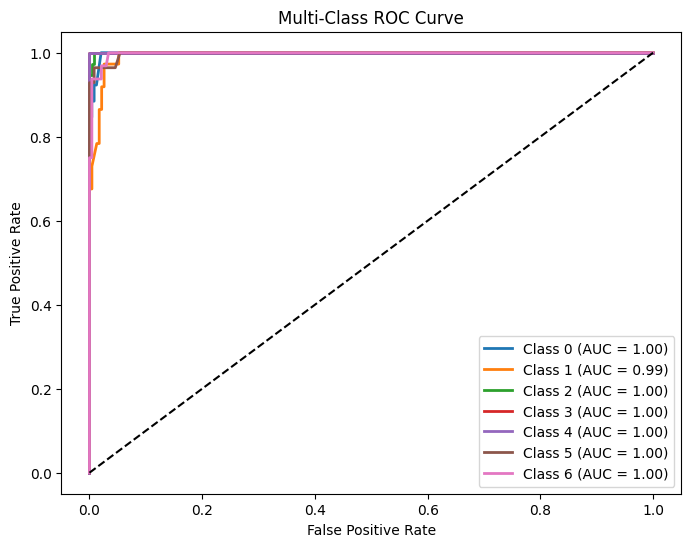

In [334]:
#ROC curve
# Binarize the target labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get probabilities for each class
rf_probs = rf_model.predict_proba(X_test)  # Shape (n_samples, n_classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [335]:
#calculating RMSE,MSE, MAE

# Store model predictions
model_predictions = {
    "Logistic Regression": log_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "XGBoost": xgb_pred,
    "KNN": knn_pred,
    "GaussianNB": gausian_pred,
    "Decision Tree": decision_pred,
    "Gradient Boosting": gradient_pred,
    "CatBoost": catboost_pred
}

# Initialize lists to store results
models = []
mse_scores = []
rmse_scores = []
mae_scores = []

# Loop through each model and calculate errors
for model_name, y_pred in model_predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Append results to lists
    models.append(model_name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    "Model": models,
    "MSE": mse_scores,
    "RMSE": rmse_scores,
    "MAE": mae_scores
})

# Display the results
print(results_df)


                 Model       MSE      RMSE       MAE
0  Logistic Regression  2.279851  1.509917  0.682836
1        Random Forest  0.354478  0.595380  0.100746
2                  SVM  0.850746  0.922359  0.253731
3              XGBoost  0.440299  0.663550  0.126866
4                  KNN  1.380597  1.174988  0.350746
5           GaussianNB  2.735075  1.653806  0.839552
6        Decision Tree  0.477612  0.691095  0.134328
7    Gradient Boosting  0.388060  0.622944  0.119403
8             CatBoost  0.205224  0.453016  0.070896


In [336]:
# Check feature names used during training
print(X_train.columns)


Index(['Gender', 'Age', 'Height', 'Weight',
       'Frequency of consumption of vegetables', 'BMR', 'Nutritional_Score'],
      dtype='object')


In [337]:
#saving the model
joblib.dump(gradient_model, "best_model_CatBoost.pkl")

['best_model_CatBoost.pkl']

# Testing and Seeing Some data

In [338]:


# Example target labels (Replace with your actual target column from training)
y_train = [
    "Obesity_Type_I", "Obesity_Type_III", "Obesity_Type_II",
    "Overweight_Level_I", "Overweight_Level_II",
    "Normal_Weight", "Insufficient_Weight"
]

# Fit LabelEncoder on training target labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Get class-to-number mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Target Encoding Mapping:", label_mapping)


Target Encoding Mapping: {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [339]:
import joblib



# Load the model
model_path = "/content/best_model_CatBoost.pkl"
model = joblib.load(model_path)  # If saved with joblib


## Saving the Scaler file

In [347]:
X_selected.head()

,Gender,Age,Height,Weight,Frequency of consumption of vegetables,BMR,Nutritional_Score
0,0.0,0.333333,0.323401,0.198323,0.5,0.283313,0.770271
1,1.0,0.428571,0.665826,0.301450,0.5,0.319341,0.770271
2,1.0,0.619048,0.665826,0.380779,1.0,0.405355,0.962839
3,1.0,0.714286,0.323401,0.111061,0.5,0.043461,0.385135
4,0.0,0.428571,0.095118,0.126926,1.0,0.212328,0.577703


In [350]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# List of selected features
selected_features = ['Gender', 'Age', 'Height', 'Weight',
                     'Frequency of consumption of vegetables', 'BMR', 'Nutritional_Score']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler only on selected features
X_selected[selected_features] = scaler.fit_transform(X_selected[selected_features])

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")


Scaler saved successfully!


In [353]:
# Create a sample test data point (modify values as needed)
test_data = np.array([
    [1, 25, 1.75, 45, 3, 1700, 2],  # Example 1: Normal weight

])

# Make predictions
predictions = model.predict(test_data)
# Load the saved scaler (ensure you saved it earlier)
scaler = joblib.load("scaler.pkl")
# Scale the test data
scaled_test_data = scaler.transform(test_data)

# Predict obesity levels
predictions = model.predict(scaled_test_data)

# Mapping from encoded labels to obesity categories
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# Convert numeric predictions to category names
predicted_categories = [obesity_mapping[pred] for pred in predictions]

# Print results
for i, category in enumerate(predicted_categories):
    print(f"Test Sample {i+1}: Predicted Obesity Level → {category}")



Test Sample 1: Predicted Obesity Level → Obesity_Type_II


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
